# Census Income


# Project Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.


# DecisionTree Classifier Model

# Step 1: importing necessary libraries and load the data

In [82]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt               
import seaborn as sns                         
from sklearn.linear_model import LogisticRegression             
from sklearn.naive_bayes import GaussianNB                      
from sklearn.tree import DecisionTreeClassifier                 
from sklearn.ensemble import RandomForestClassifier             
from sklearn.svm import SVC                                     
from sklearn.model_selection import train_test_split,GridSearchCV           
from sklearn.metrics import accuracy_score                     
from sklearn.metrics import roc_auc_score                       
from sklearn.metrics import confusion_matrix, classification_report     
from sklearn.model_selection import cross_val_score                     
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
census=pd.read_csv(r"C:\Users\HP\Downloads\census_income.csv")
census

Age          Workclass  Fnlwgt    Education  Education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divorced   Handlers-cleaners   Not-in-family   White   
2       Married-civ-spouse   Handlers-cleaners         Husband   Black   
3       Married-civ-spouse      Prof-specialty            Wife   Black   
4       Married-civ-spouse     Exec-managerial            Wife   White   
...                    ...                 ...             ...     ...   
32555   Married-civ-spouse        Tech-support            Wife   White   
32556   Married-civ-spouse   Machine-op-inspct         Husband   White   
32557              Widowed        Adm-clerical       Unmarried   White   
32558        Never-married        Adm-clerical       Own-child   White   
32559   Married-civ-spouse     Exec-managerial            Wife   White   

           Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  \
0         Male             0             0              13   United-States   
1         Male             0             0              40   United-States   
2         Male             0             0              40   United-States   
3       Female             0             0              40            Cuba   
4       Female             0             0              40   United-States   
...        ...           ...           ...             ...             ...   
32555   Female             0             0              38   United-States   
32556     Male             0             0              40   United-States   
32557   Female             0             0              40   United-States   
32558     Male             0             0              20   United-States   
32559   Female         15024             0              40   United-States   

       Income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  
32559    >50K  

[32560 rows x 15 columns]

As we can see there are 32560 rows and 15 columns. Income is our target variable it is a binary classification model.

These are the column given in the dataset:

1. Age - The age of an individual person.
2. workclass -  Represent the employment status of an individual.
3. fnlwgt - number of people the census believes the entry represents.
4. education - highest level of education achieved by an individual.
5. education_num -highest level of education achieved in numerical form.
6. marital-status - Marital status of an individual.
7. occupation - general type of occupation of an individual.
8. relationship - Represents what this individual is relative to others.
9. race - Descriptions of an individual’s race.
10. sex -  biological sex of the individual.
11. capital-gain - Capital gains for an individual.
12. capital-loss - Capital loss for an individual.
13. hours-per-week - The hours an individual has reported to work per week.
14. native-country - Country of origin for an individual.
15. income - The label whether or not an individual.

# Step2: Exploratory Data Analysis

In [3]:
#checking the shape of the dataset
census.shape

(32560, 15)

In [4]:
#checking the duplicates values
census.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32555    False
32556    False
32557    False
32558    False
32559    False
Length: 32560, dtype: bool

In [5]:
census.duplicated().value_counts()

False    32536
True        24
dtype: int64

As we can see there 24 duplicate values presented in our dataset

In [6]:
census=census.drop_duplicates()

In [7]:
census.duplicated().value_counts()

False    32536
dtype: int64

In [8]:
census.head()

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

In [9]:
#checking null values
census.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Yes, there is no missing values presented

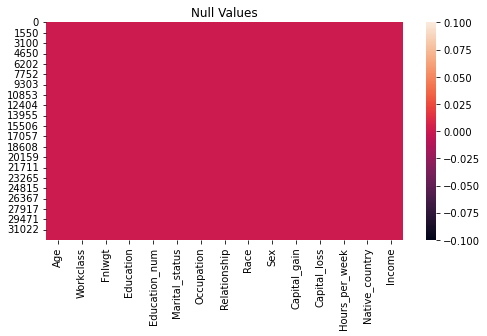

In [10]:
#Visualizing null values
plt.figure(figsize=[8,4])
sns.heatmap(census.isna())
plt.title("Null Values")
plt.show()


In [11]:
#Getting the normal summary and statistical information of the data
census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       32536 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      32536 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  32536 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


It has  6 int64 and 9 object types data and zero null values.

In [12]:
#checking datatypes
census.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [13]:
#seperating the categorical column and numerical column
categorical_col=[]
for i in census.dtypes.index:
    if census.dtypes[i] == "object":
        categorical_col.append(i)
print("categorical column: ", categorical_col)
print("\n")

numerical_col=[]
for i in census.dtypes.index:
    if census.dtypes[i]!="object":
        numerical_col.append(i)
print("numerical column: ", numerical_col)
print("\n")

categorical column:  ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


numerical column:  ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']




In [14]:
census.describe()

Age        Fnlwgt  Education_num  Capital_gain  Capital_loss  \
count  32536.000000  3.253600e+04   32536.000000  32536.000000  32536.000000   
mean      38.585536  1.897843e+05      10.081725   1078.410069     87.370912   
std       13.638193  1.055563e+05       2.571622   7388.068465    403.107737   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.369932e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       Hours_per_week  
count    32536.000000  
mean        40.440343  
std         12.347079  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

As per my observation, the value count is same in all the columns which indicates no missing data.
The difference between the mean and standard devaition of each is not very less.
The mean value is more than 50% of median in all columns so, there will skewness problem.
Also we can have min, 75%, max values.

In [15]:
census.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

# Step 3: Visualization

# Univariate Analysis: 

<AxesSubplot:xlabel='Income', ylabel='count'>

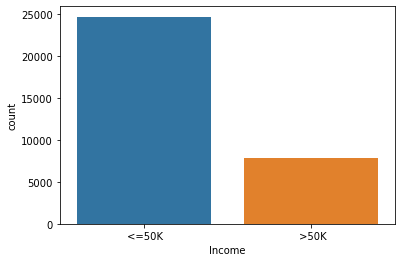

In [16]:
sns.countplot(census.Income)

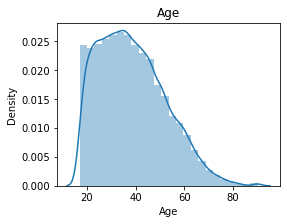

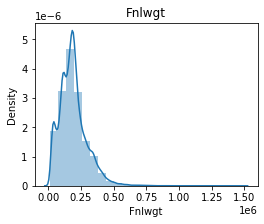

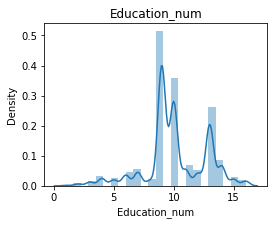

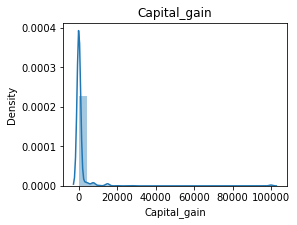

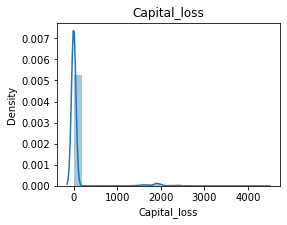

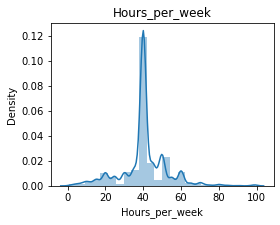

In [17]:
#distribution plot for numerical columns
for k in census[numerical_col]:              
    plt.figure(figsize = (4, 3))
    sns.distplot(census[k], bins = 24)
    plt.title(k)
    plt.show()

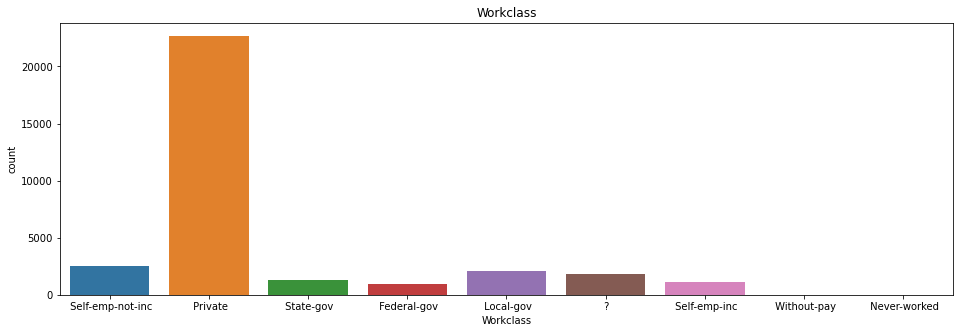

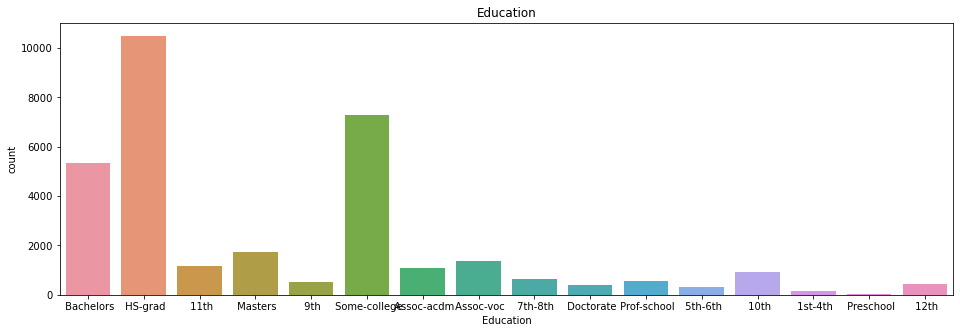

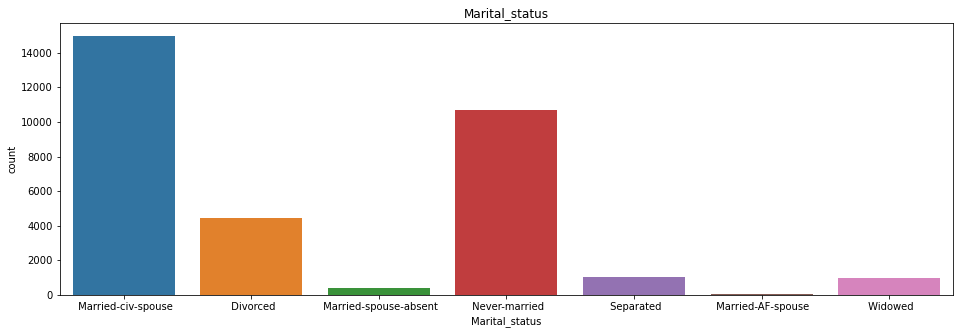

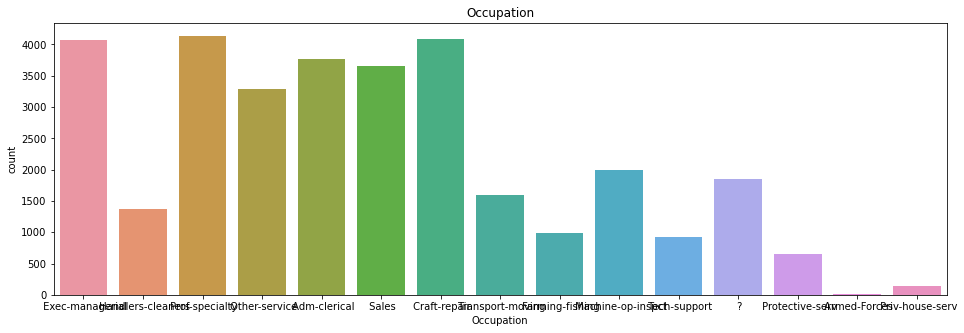

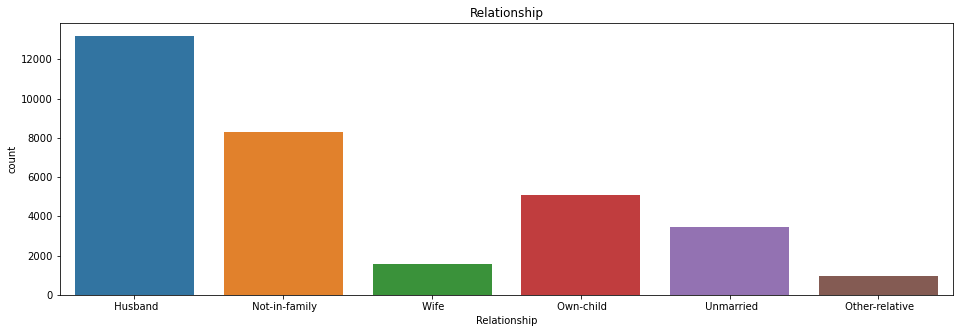

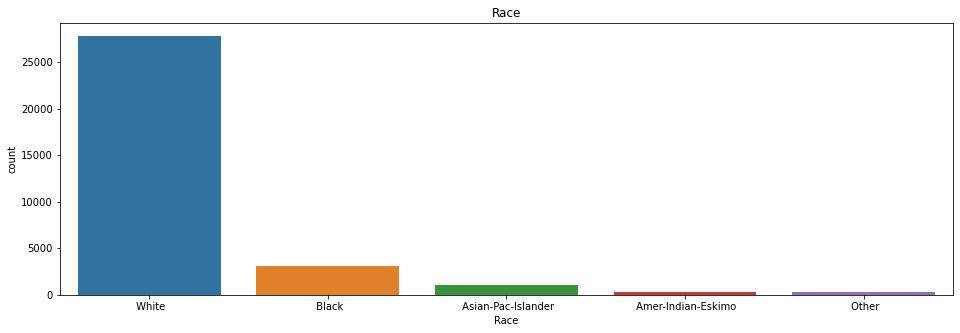

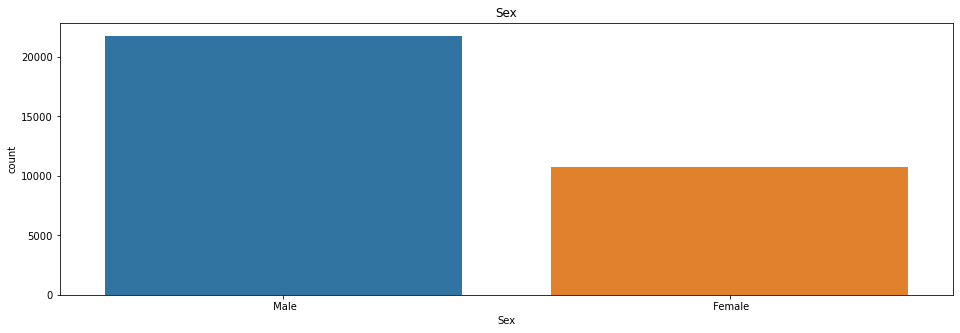

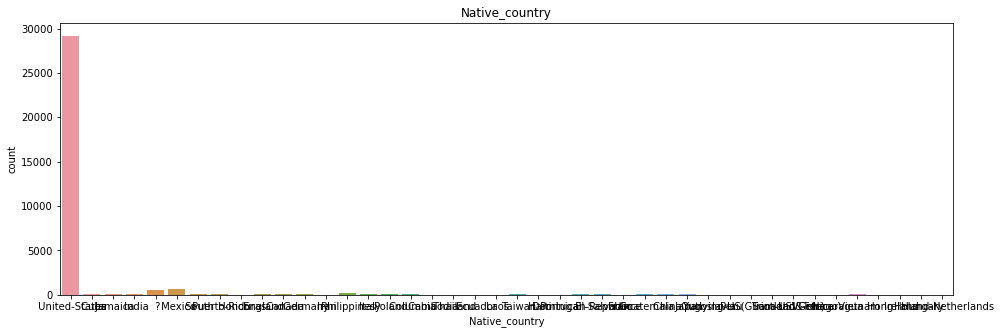

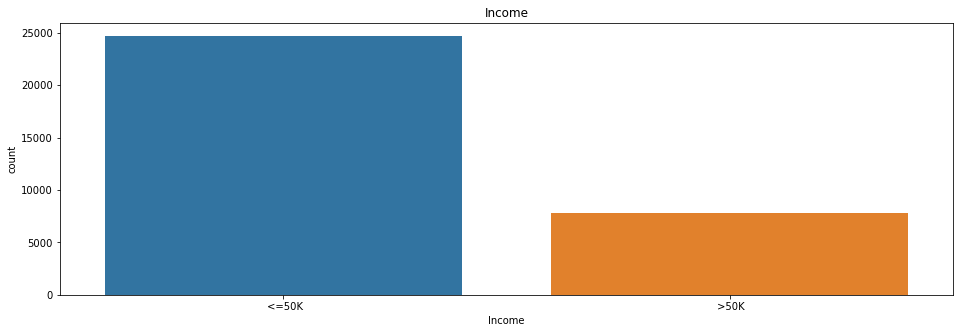

In [18]:
#distribution plot for numerical columns
for k in census[categorical_col]:              
    plt.figure(figsize = (16, 5))
    sns.countplot(census[k])
    plt.title(k)
    plt.show()

# Bivariate Analysis

In [19]:
#displaying the list of columns
census.columns.tolist()

['Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Native_country',
 'Income']

<AxesSubplot:xlabel='Income', ylabel='Age'>

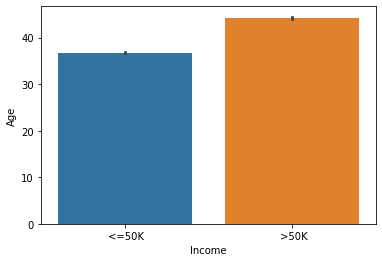

In [22]:
# Checking age and income
plt.figure(figsize=(6,4))
sns.barplot(y='Age',x='Income',data=census)

As we can see if the age increases the income is also high.

<AxesSubplot:xlabel='Income', ylabel='Fnlwgt'>

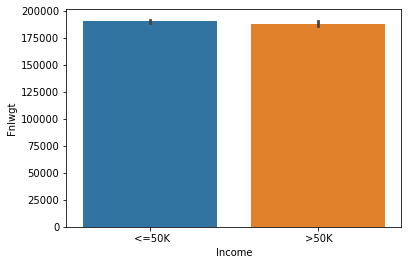

In [24]:
# Checking Fnlwgt and income
plt.figure(figsize=(6,4))
sns.barplot(y='Fnlwgt',x='Income',data=census)

<AxesSubplot:xlabel='Income', ylabel='Education_num'>

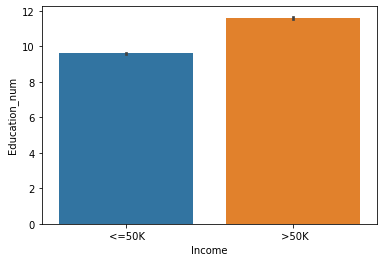

In [26]:
# Checking Education_num and income
plt.figure(figsize=(6,4))
sns.barplot(y='Education_num',x='Income',data=census)

here education_num increases the income also increases.

<AxesSubplot:xlabel='Income', ylabel='Capital_gain'>

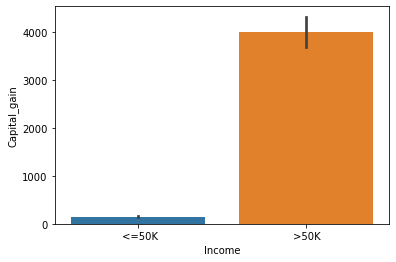

In [27]:
# Checking Capital_gain and income
plt.figure(figsize=(6,4))
sns.barplot(y='Capital_gain',x='Income',data=census)

<AxesSubplot:xlabel='Income', ylabel='Capital_loss'>

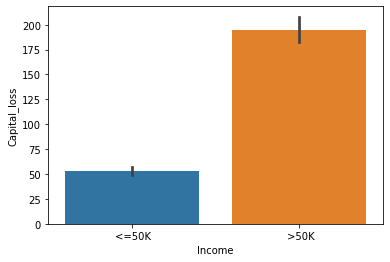

In [29]:
# Checking Capital_loss and income
plt.figure(figsize=(6,4))
sns.barplot(y='Capital_loss',x='Income',data=census)

<AxesSubplot:xlabel='Income', ylabel='Hours_per_week'>

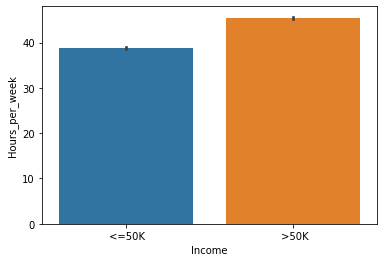

In [31]:
# Checking Hours_per_week and income
plt.figure(figsize=(6,4))
sns.barplot(y='Hours_per_week',x='Income',data=census)

In [32]:
census['Education'].value_counts()

 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64

In [33]:
census['Education_num'].value_counts()

9     10494
10     7282
13     5352
14     1722
11     1382
7      1175
12     1067
6       933
4       645
15      576
5       514
8       433
16      413
3       332
2       166
1        50
Name: Education_num, dtype: int64

Here i am dropping the education feature, which is a duplicate feature of education_num in a nonnumerical format.

The matching education level of the education number will be as follows:

1: Preschool, 2: 1st-4th, 3: 5th-6th, 4: 7th-8th, 5: 9th, 6: 10th, 7: 11th, 8: 12th, 9: HS-grad,

10: Some-college, 11: Assoc-voc, 12: Assoc-acdm, 13: Bachelors, 14: Masters, 15: Prof-school, 16: Doctorate

In [34]:
census=census.drop('Education',axis=1)

In [35]:
census.shape

(32536, 14)

# Preprocessing

In [36]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in census.columns:
    census[column] = labelencoder.fit_transform(census[column])

In [37]:
census.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

Now there is only numerical data

In [38]:
census['Income'].value_counts()

0    24697
1     7839
Name: Income, dtype: int64

# Multivariate analysis

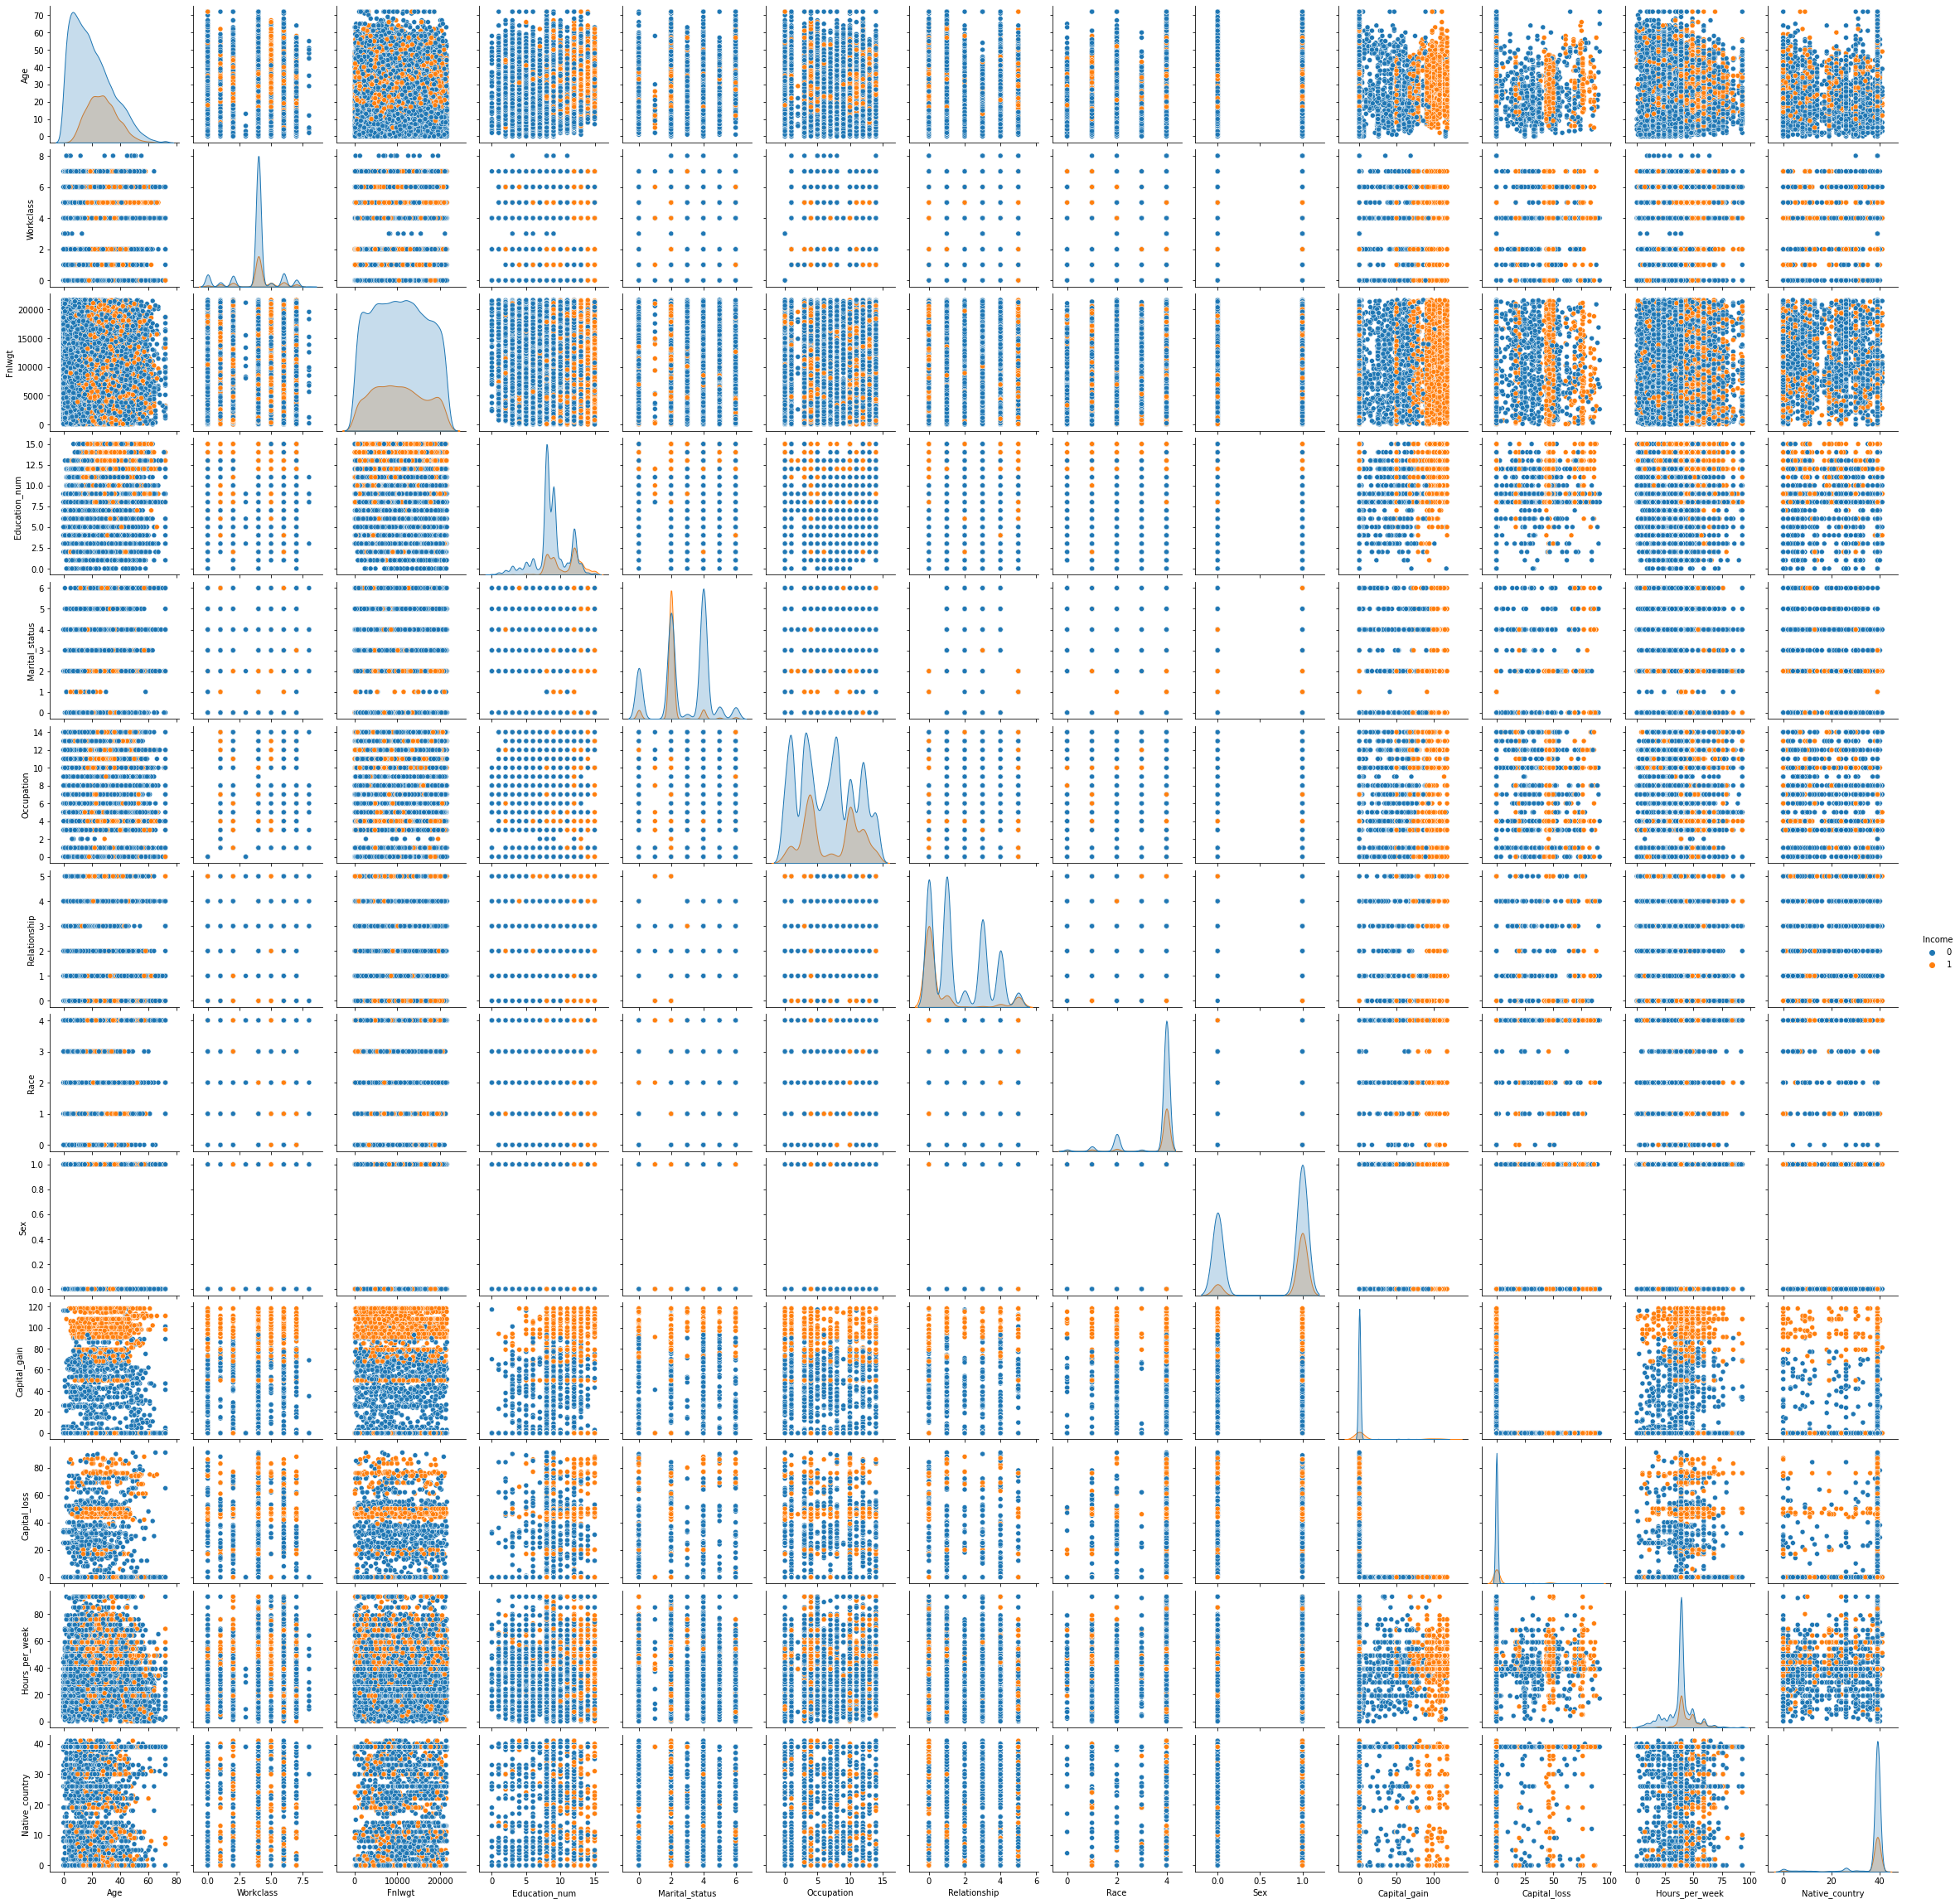

In [45]:
#pair ploting for census
sns.pairplot(census,hue='Income')

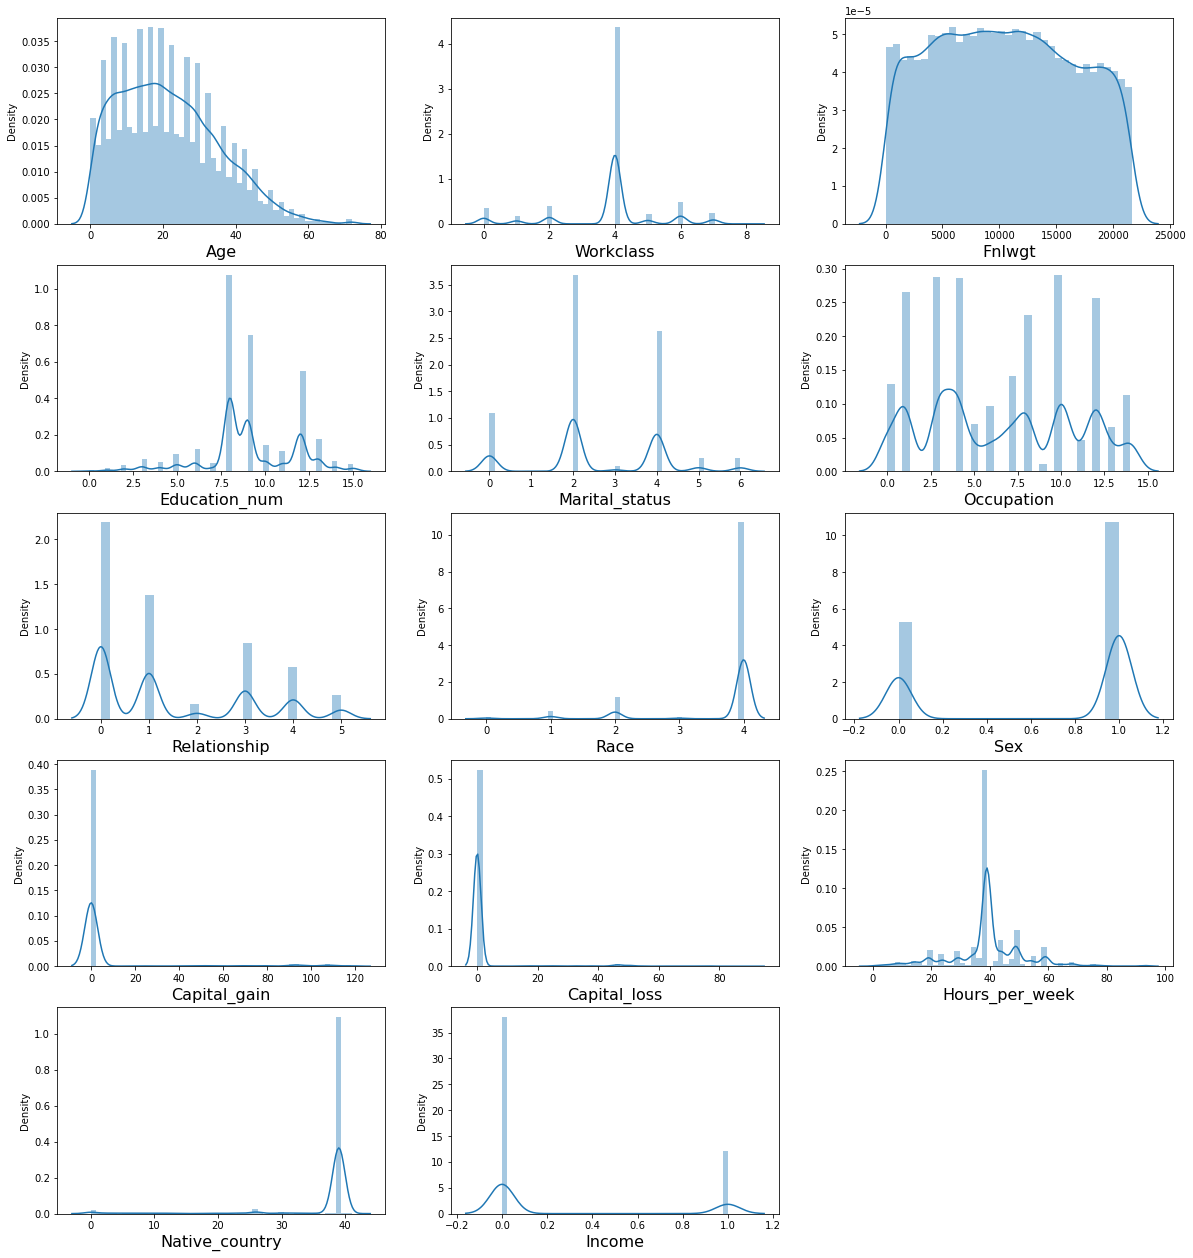

In [39]:
plt.figure(figsize=(20,22),facecolor="white")
plotnumber=1
for columns in census:
    if plotnumber<=14:
    
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(census[columns])
        plt.xlabel(columns, fontsize=16)
        
    plotnumber+=1
plt.show()

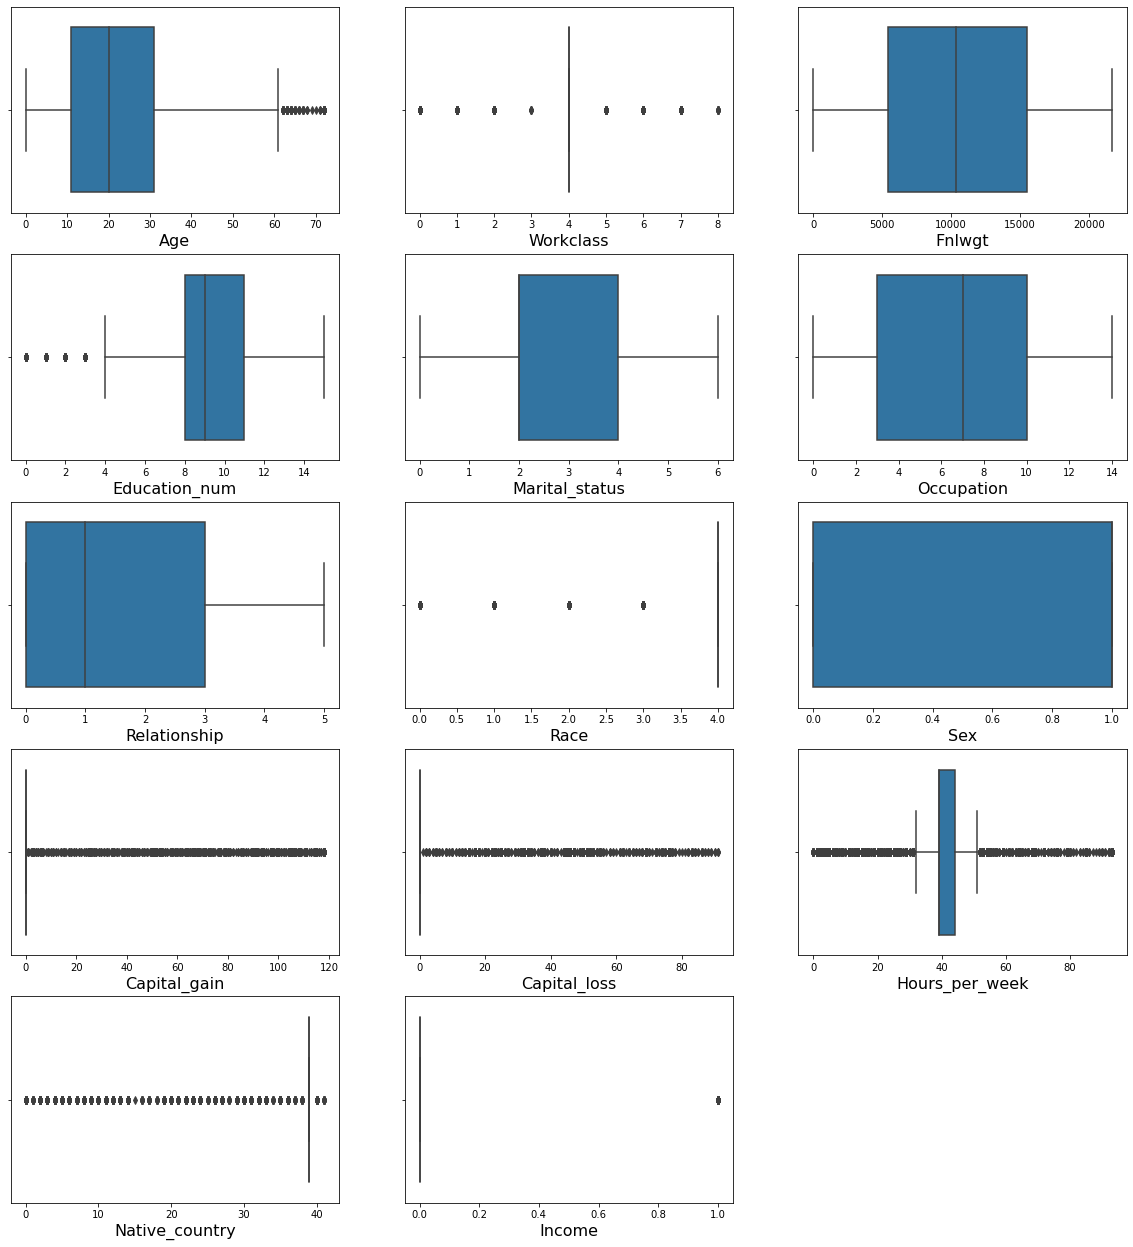

In [40]:
plt.figure(figsize=(20,22),facecolor="white")
plotnumber=1
for columns in census:
    if plotnumber<=14:
    
        ax=plt.subplot(5,3,plotnumber)
        sns.boxplot(census[columns])
        plt.xlabel(columns, fontsize=16)
        
    plotnumber+=1
plt.show()

Most of the comes have outliers, so we have to remove those outliers

In [41]:
# removing outliers using statsmodel
from scipy import stats
from scipy.stats import zscore
data1=census.drop('Income', axis=1)
z=np.abs(zscore(data1))
threshold=3
np.where(z>3)
data=census[(z<3).all(axis=1)]

In [42]:
data

Age  Workclass  Fnlwgt  Education_num  Marital_status  Occupation  \
0       33          6    2925             12               2           4   
1       21          4   14085              8               0           6   
2       36          4   15335              6               2           6   
4       20          4   17699             13               2           4   
5       32          4    8535              4               3           8   
...    ...        ...     ...            ...             ...         ...   
32554    5          4   18559              9               4          11   
32555   10          4   16527             11               2          13   
32556   23          4    8079              8               2           7   
32557   41          4    7882              8               6           1   
32558    5          4   12880              8               4           1   

       Relationship  Race  Sex  Capital_gain  Capital_loss  Hours_per_week  \
0                 0     4    1             0             0              12   
1                 1     4    1             0             0              39   
2                 0     2    1             0             0              39   
4                 5     4    0             0             0              39   
5                 1     2    0             0             0              15   
...             ...   ...  ...           ...           ...             ...   
32554             1     4    1             0             0              39   
32555             5     4    0             0             0              37   
32556             0     4    1             0             0              39   
32557             4     4    0             0             0              39   
32558             3     4    1             0             0              19   

       Native_country  Income  
0                  39       0  
1                  39       0  
2                  39       0  
4                  39       0  
5                  23       0  
...               ...     ...  
32554              39       0  
32555              39       0  
32556              39       1  
32557              39       0  
32558              39       0  

[26716 rows x 14 columns]

In [43]:
z

Age  Workclass    Fnlwgt  Education_num  Marital_status  \
0      0.837352   1.463505  1.252081       1.134817        0.405890   
1      0.042855   0.090200  0.593037       0.420646        1.733664   
2      1.057404   0.090200  0.799704       1.198377        0.405890   
3      0.776360   0.090200  1.464178       1.134817        0.405890   
4      0.116205   0.090200  1.190552       1.523683        0.405890   
...         ...        ...       ...            ...             ...   
32555  0.849711   0.090200  0.996781       0.745951        0.405890   
32556  0.103846   0.090200  0.399954       0.420646        0.405890   
32557  1.424156   0.090200  0.432524       0.420646        2.249657   
32558  1.216463   0.090200  0.393811       0.420646        0.921884   
32559  0.984053   0.776852  1.211218       0.420646        0.405890   

       Occupation  Relationship      Race       Sex  Capital_gain  \
0        0.608366      0.900122  0.393692  0.703036      0.279108   
1        0.135486      0.277868  0.393692  0.703036      0.279108   
2        0.135486      0.900122  1.962450  0.703036      0.279108   
3        0.810273      2.211146  1.962450  1.422403      0.279108   
4        0.608366      2.211146  0.393692  1.422403      0.279108   
...           ...           ...       ...       ...           ...   
32555    1.519592      2.211146  0.393692  1.422403      0.279108   
32556    0.100953      0.900122  0.393692  0.703036      0.279108   
32557    1.317685      1.588892  0.393692  1.422403      0.279108   
32558    1.317685      0.966639  0.393692  0.703036      0.279108   
32559    0.608366      2.211146  0.393692  1.422403      4.354497   

       Capital_loss  Hours_per_week  Native_country  
0          0.204258        2.254802        0.291340  
1          0.204258        0.031357        0.291340  
2          0.204258        0.031357        0.291340  
3          0.204258        0.031357        4.056085  
4          0.204258        0.031357        0.291340  
...             ...             ...             ...  
32555      0.204258        0.196057        0.291340  
32556      0.204258        0.031357        0.291340  
32557      0.204258        0.031357        0.291340  
32558      0.204258        1.678353        0.291340  
32559      0.204258        0.031357        0.291340  

[32536 rows x 13 columns]

In [44]:
data_loss=(32536-26716)/32536*100
data_loss

17.887878042783377

In [45]:
from scipy import stats 
IQR = stats.iqr(census) 
IQR

19.0

In [46]:
Q1 = census.quantile(0.25)
Q3 = census.quantile(0.75)
census_out = census[~((census < (Q1 - 1.5 * IQR)) |(census> (Q3 + 1.5 * IQR))).any(axis=1)]
print(census_out.shape)

(13328, 14)


In zscore method the dataloss is less compared with IQR method so i am considering Zscore method.

In [47]:
data.head()

Age  Workclass  Fnlwgt  Education_num  Marital_status  Occupation  \
0   33          6    2925             12               2           4   
1   21          4   14085              8               0           6   
2   36          4   15335              6               2           6   
4   20          4   17699             13               2           4   
5   32          4    8535              4               3           8   

   Relationship  Race  Sex  Capital_gain  Capital_loss  Hours_per_week  \
0             0     4    1             0             0              12   
1             1     4    1             0             0              39   
2             0     2    1             0             0              39   
4             5     4    0             0             0              39   
5             1     2    0             0             0              15   

   Native_country  Income  
0              39       0  
1              39       0  
2              39       0  
4              39       0  
5              23       0

In [48]:
#corelation b/n features and target variable.
corr=data.corr()
corr

Age  Workclass    Fnlwgt  Education_num  Marital_status  \
Age             1.000000   0.005891 -0.082382       0.030291       -0.286514   
Workclass       0.005891   1.000000 -0.024436       0.047323       -0.063715   
Fnlwgt         -0.082382  -0.024436  1.000000      -0.041732        0.031663   
Education_num   0.030291   0.047323 -0.041732       1.000000       -0.048734   
Marital_status -0.286514  -0.063715  0.031663      -0.048734        1.000000   
Occupation     -0.015492   0.251883 -0.002144       0.107772       -0.005007   
Relationship   -0.269143  -0.090514  0.018147      -0.083403        0.182868   
Race            0.017498   0.063657 -0.113855       0.080944       -0.086262   
Sex             0.080505   0.091314  0.020141      -0.009543       -0.121764   
Capital_gain    0.049544  -0.000040  0.001316       0.004845       -0.027327   
Capital_loss   -0.001053  -0.001277 -0.007560       0.002872       -0.002511   
Hours_per_week  0.089519   0.125148 -0.021573       0.146571       -0.198988   
Native_country  0.031982  -0.004217 -0.103219       0.143907       -0.031279   
Income          0.219441   0.037223 -0.010249       0.293295       -0.182239   

                Occupation  Relationship      Race       Sex  Capital_gain  \
Age              -0.015492     -0.269143  0.017498  0.080505      0.049544   
Workclass         0.251883     -0.090514  0.063657  0.091314     -0.000040   
Fnlwgt           -0.002144      0.018147 -0.113855  0.020141      0.001316   
Education_num     0.107772     -0.083403  0.080944 -0.009543      0.004845   
Marital_status   -0.005007      0.182868 -0.086262 -0.121764     -0.027327   
Occupation        1.000000     -0.078690  0.012005  0.080380      0.008095   
Relationship     -0.078690      1.000000 -0.149015 -0.565243     -0.039448   
Race              0.012005     -0.149015  1.000000  0.123988      0.016561   
Sex               0.080380     -0.565243  0.123988  1.000000      0.026218   
Capital_gain      0.008095     -0.039448  0.016561  0.026218      1.000000   
Capital_loss      0.002554     -0.010090  0.002050 -0.003671     -0.018873   
Hours_per_week    0.067461     -0.258605  0.056232  0.232157      0.020902   
Native_country    0.011168     -0.017707  0.056523 -0.007656      0.009174   
Income            0.068579     -0.234797  0.089869  0.199910      0.018947   

                Capital_loss  Hours_per_week  Native_country    Income  
Age                -0.001053        0.089519        0.031982  0.219441  
Workclass          -0.001277        0.125148       -0.004217  0.037223  
Fnlwgt             -0.007560       -0.021573       -0.103219 -0.010249  
Education_num       0.002872        0.146571        0.143907  0.293295  
Marital_status     -0.002511       -0.198988       -0.031279 -0.182239  
Occupation          0.002554        0.067461        0.011168  0.068579  
Relationship       -0.010090       -0.258605       -0.017707 -0.234797  
Race                0.002050        0.056232        0.056523  0.089869  
Sex                -0.003671        0.232157       -0.007656  0.199910  
Capital_gain       -0.018873        0.020902        0.009174  0.018947  
Capital_loss        1.000000        0.012905        0.008494 -0.019763  
Hours_per_week      0.012905        1.000000        0.008288  0.219287  
Native_country      0.008494        0.008288        1.000000  0.043565  
Income             -0.019763        0.219287        0.043565  1.000000

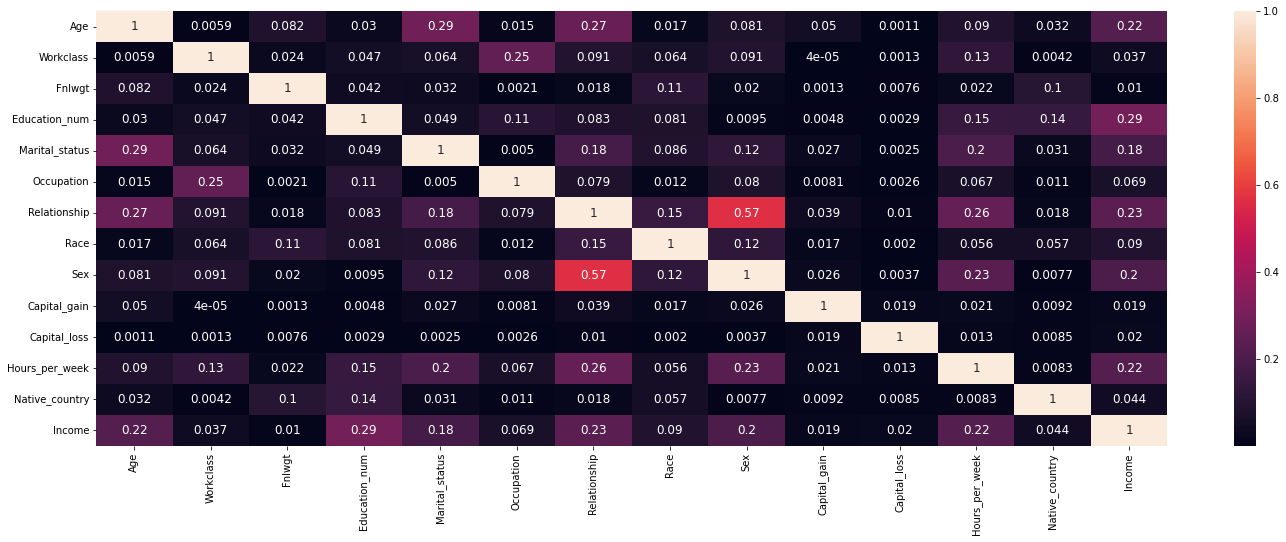

In [49]:
df_corr=data.corr().abs()
plt.figure(figsize=(24,8))
sns.heatmap(df_corr, annot=True, linecolor='blue', annot_kws={'size':12},)
plt.show()

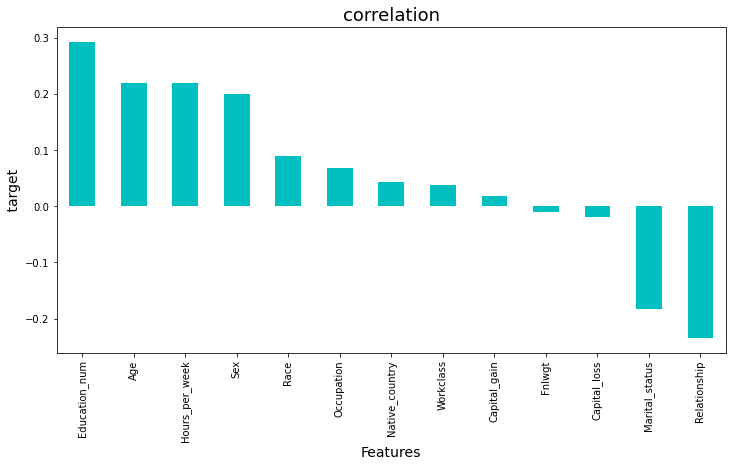

In [50]:
plt.figure(figsize=(12,6))
data.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel(' target ',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [51]:
data=data.drop('Fnlwgt',axis=1)

In [52]:
data=data.drop(['Capital_gain','Capital_loss'],axis=1)

In [53]:
data.skew()

Age               0.512915
Workclass        -0.746276
Education_num    -0.149531
Marital_status   -0.086249
Occupation        0.135921
Relationship      0.709607
Race             -2.523755
Sex              -0.649206
Hours_per_week   -0.381227
Native_country   -5.345412
Income            1.577115
dtype: float64

In [54]:
data

Age  Workclass  Education_num  Marital_status  Occupation  \
0       33          6             12               2           4   
1       21          4              8               0           6   
2       36          4              6               2           6   
4       20          4             13               2           4   
5       32          4              4               3           8   
...    ...        ...            ...             ...         ...   
32554    5          4              9               4          11   
32555   10          4             11               2          13   
32556   23          4              8               2           7   
32557   41          4              8               6           1   
32558    5          4              8               4           1   

       Relationship  Race  Sex  Hours_per_week  Native_country  Income  
0                 0     4    1              12              39       0  
1                 1     4    1              39              39       0  
2                 0     2    1              39              39       0  
4                 5     4    0              39              39       0  
5                 1     2    0              15              23       0  
...             ...   ...  ...             ...             ...     ...  
32554             1     4    1              39              39       0  
32555             5     4    0              37              39       0  
32556             0     4    1              39              39       1  
32557             4     4    0              39              39       0  
32558             3     4    1              19              39       0  

[26716 rows x 11 columns]

In [55]:
#fixing features and label

a=data.drop('Income', axis=1)
b=data['Income']

In [56]:
b.value_counts()

0    21629
1     5087
Name: Income, dtype: int64

In [57]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_scaled=scaler.fit_transform(a)
x_scaled
a=pd.DataFrame(scaler.fit_transform(a),columns=a.columns)
a

Age  Workclass  Education_num  Marital_status  Occupation  \
0      0.912721   1.478993       1.268609       -0.414652   -0.593466   
1      0.016878   0.098465      -0.408328       -1.715707   -0.123178   
2      1.136682   0.098465      -1.246797       -0.414652   -0.123178   
3     -0.057776   0.098465       1.687844       -0.414652   -0.593466   
4      0.838068   0.098465      -2.085266        0.235876    0.347109   
...         ...        ...            ...             ...         ...   
26711 -1.177580   0.098465       0.010906        0.886404    1.052539   
26712 -0.804312   0.098465       0.849375       -0.414652    1.522827   
26713  0.166185   0.098465      -0.408328       -0.414652    0.111965   
26714  1.509950   0.098465      -0.408328        2.187459   -1.298896   
26715 -1.177580   0.098465      -0.408328        0.886404   -1.298896   

       Relationship      Race       Sex  Hours_per_week  Native_country  
0         -0.939179  0.351447  0.726774       -2.395332        0.197759  
1         -0.313575  0.351447  0.726774        0.029352        0.197759  
2         -0.939179 -2.899116  0.726774        0.029352        0.197759  
3          2.188841  0.351447 -1.375944        0.029352        0.197759  
4         -0.313575 -2.899116 -1.375944       -2.125922       -5.562603  
...             ...       ...       ...             ...             ...  
26711     -0.313575  0.351447  0.726774        0.029352        0.197759  
26712      2.188841  0.351447 -1.375944       -0.150254        0.197759  
26713     -0.939179  0.351447  0.726774        0.029352        0.197759  
26714      1.563237  0.351447 -1.375944        0.029352        0.197759  
26715      0.937633  0.351447  0.726774       -1.766710        0.197759  

[26716 rows x 10 columns]

In [58]:
x_scaled

array([[ 0.91272114,  1.47899294,  1.26860927, ...,  0.72677399,
        -2.39533157,  0.19775909],
       [ 0.01687782,  0.09846518, -0.40832826, ...,  0.72677399,
         0.02935172,  0.19775909],
       [ 1.13668197,  0.09846518, -1.24679703, ...,  0.72677399,
         0.02935172,  0.19775909],
       ...,
       [ 0.16618504,  0.09846518, -0.40832826, ...,  0.72677399,
         0.02935172,  0.19775909],
       [ 1.50995002,  0.09846518, -0.40832826, ..., -1.37594357,
         0.02935172,  0.19775909],
       [-1.17757994,  0.09846518, -0.40832826, ...,  0.72677399,
        -1.76670998,  0.19775909]])

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(a.values,i) for i in range(len(a.columns))] 

vif['features']=a.columns
vif

VIF values        features
0    1.165510             Age
1    1.089077       Workclass
2    1.068173   Education_num
3    1.140882  Marital_status
4    1.084916      Occupation
5    1.650114    Relationship
6    1.039914            Race
7    1.519685             Sex
8    1.142544  Hours_per_week
9    1.024930  Native_country

Yes, no issues with multicollinearity

In [60]:
b.value_counts()

0    21629
1     5087
Name: Income, dtype: int64

In [61]:
#balancing the label values.
from imblearn.over_sampling import SMOTE
sampling= SMOTE()

a,b=sampling.fit_resample(a,b)

In [62]:
b.value_counts()

0    21629
1    21629
Name: Income, dtype: int64

# Step4: Modelling

In [63]:
scaler=StandardScaler()

x_scaled=scaler.fit_transform(a)
x_scaled

array([[ 0.804698  ,  1.4814465 ,  1.01110931, ...,  0.60976815,
        -2.68323367,  0.17649866],
       [-0.16357353,  0.07186841, -0.6310403 , ...,  0.60976815,
        -0.14834908,  0.17649866],
       [ 1.04676588,  0.07186841, -1.45211511, ...,  0.60976815,
        -0.14834908,  0.17649866],
       ...,
       [ 0.0658347 ,  0.07186841,  1.01110931, ...,  0.60976815,
         1.1078598 ,  0.17649866],
       [ 1.09562539,  0.07186841, -0.2205029 , ...,  0.60976815,
        -0.29648907,  0.17649866],
       [-0.25329276,  0.07186841, -0.6310403 , ...,  0.60976815,
         1.93812568,  0.17649866]])

In [64]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [65]:
#getting best random state

Accu_max=0
Rs_max=0
for k in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(a,b, test_size=0.22, random_state=k)
    
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred=RFC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu_max:
        Accu_max= acc
        Rs_max=k
print('The best accuracy is', Accu_max, 'at random state is', Rs_max)

The best accuracy is 0.8966060733424398 at random state is 31


In [66]:
#forming train_test_split
x_train,x_test,y_train,y_test=train_test_split(a,b, test_size=0.22, random_state=31)

In [67]:
def metric_score(clf, x_train,x_test,y_train,y_test,train=True):
    if train==False:
        pred=clf.predict(x_test)
        
        print("\n================ Test Result ================== ")
        print(f"Accuracy Score: {accuracy_score(y_test,pred)*100:2f}%")
        print('\n \n Test Classification Reprt \n', classification_report(y_test,pred, digits=2))
        

In [68]:
dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)
metric_score(dc,x_train,x_test,y_train,y_test, train=True)
metric_score(dc,x_train,x_test,y_train,y_test, train=False)
y_pred=dc.predict(x_test)
probs_dc=dc.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 86.361248%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.86      0.87      0.86      4763
           1       0.87      0.86      0.86      4754

    accuracy                           0.86      9517
   macro avg       0.86      0.86      0.86      9517
weighted avg       0.86      0.86      0.86      9517



array([[4137,  626],
       [ 672, 4082]], dtype=int64)

In [69]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
metric_score(rfc,x_train,x_test,y_train,y_test, train=True)
metric_score(rfc,x_train,x_test,y_train,y_test, train=False)
y_pred=rfc.predict(x_test)
probs_rfc=rfc.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 89.471472%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.90      0.89      0.89      4763
           1       0.89      0.90      0.90      4754

    accuracy                           0.89      9517
   macro avg       0.89      0.89      0.89      9517
weighted avg       0.89      0.89      0.89      9517



array([[4221,  542],
       [ 460, 4294]], dtype=int64)

In [71]:
bag=BaggingClassifier()
bag.fit(x_train,y_train)
metric_score(bag,x_train,x_test,y_train,y_test, train=True)
metric_score(bag,x_train,x_test,y_train,y_test, train=False)
y_pred=bag.predict(x_test)
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 88.525796%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.88      0.89      0.89      4763
           1       0.89      0.88      0.88      4754

    accuracy                           0.89      9517
   macro avg       0.89      0.89      0.89      9517
weighted avg       0.89      0.89      0.89      9517



array([[4261,  502],
       [ 590, 4164]], dtype=int64)

In [73]:
Etc=ExtraTreesClassifier()
Etc.fit(x_train,y_train)
metric_score(Etc,x_train,x_test,y_train,y_test, train=True)
metric_score(Etc,x_train,x_test,y_train,y_test, train=False)
y_pred=Etc.predict(x_test)
probs_Etc=Etc.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Test Result ================== 
Accuracy Score: 89.891773%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.90      0.89      0.90      4763
           1       0.89      0.90      0.90      4754

    accuracy                           0.90      9517
   macro avg       0.90      0.90      0.90      9517
weighted avg       0.90      0.90      0.90      9517



array([[4256,  507],
       [ 455, 4299]], dtype=int64)

# Crossvalidation

In [79]:
score=cross_val_score(dc, a,b)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.73381877 0.86927878 0.89239482 0.89111085 0.88625592]
0.8545718300226168
Difference between Accuracy score and cross validation score is-  -0.3457980567747446


In [76]:
score=cross_val_score(Etc, a,b)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.83460472 0.904184   0.91597319 0.92359265 0.91862212]
0.8993953355241068
Difference between Accuracy score and cross validation score is-  -0.39062156227623457


In [77]:
score=cross_val_score(bag, a,b)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.74676375 0.8925104  0.91169672 0.91631025 0.90937464]
0.8753311531412834
Difference between Accuracy score and cross validation score is-  -0.3665573798934112


In [78]:
score=cross_val_score(rfc, a,b)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.793227   0.89932963 0.91516412 0.92336146 0.9173506 ]
0.8896865629231717
Difference between Accuracy score and cross validation score is-  -0.3809127896752995


after crossvalidation calculation Decisiontree classifier model has less score comparing with other models, so i am doing hyperparameter for this model.

# Step5: Hyperparameter Tuning

In [80]:
#import the Grid search CV
grid_param={
    'criterion':['gini','entropy'],
    'max_depth':range(20,42),
    'min_samples_leaf': range(1,4),
    'min_samples_split':range(1,5),
    'max_leaf_nodes' :range(20,40)
}

In [83]:
grid_search=GridSearchCV(estimator=dc,
                        param_grid=grid_param,
                        cv=5,
                         n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(20, 42),
                         'max_leaf_nodes': range(20, 40),
                         'min_samples_leaf': range(1, 4),
                         'min_samples_split': range(1, 5)})

In [84]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_leaf_nodes': 37,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [187]:
final_model=DecisionTreeClassifier( max_depth=1440,max_leaf_nodes=1467,min_samples_leaf=1,min_samples_split=2)
final_model.fit(x_train,y_train)
metric_score(final_model,x_train,x_test,y_train,y_test,train=False)


================ Test Result ================== 
Accuracy Score: 87.737732%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      4763
           1       0.88      0.88      0.88      4754

    accuracy                           0.88      9517
   macro avg       0.88      0.88      0.88      9517
weighted avg       0.88      0.88      0.88      9517



After tuning the parameters the score is increased to 87.73%. yes it is a best model.

# ROC-Curve

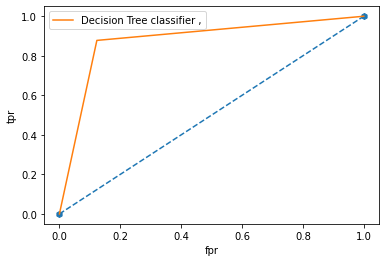

Auc Score is : 
 87.73777119609146


In [189]:
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve

y_pred=final_model.predict(x_test)
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)

plt.plot([0,1],[0,1],'h--')
plt.plot(fpr,tpr, label="Decision Tree classifier ," %roc_auc)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend()
plt.show()
auc_score=roc_auc_score(y_test, final_model.predict(x_test))
print('Auc Score is :','\n', auc_score*100)

# step6: Save the model

In [190]:
#saving my model
import pickle

filename='Census Income prediction'
pickle.dump(dc, open(filename,'wb'))


In [191]:
import pickle
loaded_model=pickle.load(open('Census Income prediction','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

86.36124829252915


In [192]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['original','predicted'])
conclusion

0     1     2     3     4     5     6     7     8     9     ...  \
original      0     1     0     1     0     0     0     0     1     1  ...   
predicted     1     1     0     0     0     0     0     0     1     1  ...   

           9507  9508  9509  9510  9511  9512  9513  9514  9515  9516  
original      0     0     1     1     1     1     1     0     1     0  
predicted     1     0     1     1     1     1     1     0     1     1  

[2 rows x 9517 columns]

Finally, done.